<a href="https://colab.research.google.com/github/beneDesp/GLDM3002/blob/finalProject/finalProjectTeam2_MW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NGA GLDM3002 Final Project Team 2



*   Phillip Allan
*   John J Haumann III
*   Matthew Levine
*   Matthew Walsh​

## Part I


### 1. Design your CRISP Model as shown in Figure 1:

In [1]:
#Part I: Multiple Linear Regression
#Business Understanding:

#Objective: Predict the price of a used Toyota Corolla based on its specifications.
#Data Understanding:

#Dataset: ToyotaCorolla.csv
#Attributes: Price, Age, Kilometers, HP, Fuel_Type, Automatic, Doors, Quarterly_Tax, Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player, Powered_Windows, Sport_Model, Tow_Bar, etc.
#Data Preparation:

#Load the data and inspect it.
#Clean the data by handling missing values, outliers, and data types.
#Split the data into training (50%), validation (30%), and test (20%) datasets.
#Modeling:

#Run a multiple linear regression with the specified predictor variables.
#Identify the most important car specifications for predicting the car's price.
#Evaluation:

#Assess the model's performance using appropriate metrics (e.g., RMSE, R-squared).
#Identify the three or four most important car specifications for predicting the price.
#Part II: Regression Trees
#Business Understanding:

#Objective: Predict the price of a used Toyota Corolla based on its specifications using regression trees.
#Data Understanding:

#Dataset: ToyotaCorolla.csv
#Data Preparation:

#Split the data into training (60%) and validation (40%) datasets.
#Convert categorical variables (e.g., Fuel_Type) to dummy variables.
#Modeling:

#Run a full-grown regression tree with the specified predictor variables.
#Set random_state=1.
#Evaluation:

#Identify the most important car specifications for predicting the car's price.
#Compare the prediction errors of the training and validation sets by examining their RMSE and boxplots.
#Predict the price of a Toyota Corolla with given specifications.

### 2.  Split the data into training (50%), validation (30%), and test (20%)datasets.

In [2]:
#run cell with next 2 lines uncommented and use "Choose Files" GUI to load ToyotaCorolla.xlsx
from google.colab import files
uploaded = files.upload()

Saving ToyotaCorolla.xlsx to ToyotaCorolla (1).xlsx


In [3]:
import pandas as pd

corolla = pd.read_excel("ToyotaCorolla.xlsx", sheet_name="data")
print(corolla.shape)

# Drop any rows with missing values (if any)
corolla = corolla.dropna()
print(corolla.shape)

(1436, 39)
(1436, 39)


In [4]:
# prior to splitting data we perfrom some data preparation steps that propagate through the training, validation, and test data sets
# and save time performing each step on those data sets individually in subsequent tasks

#the first of thes stepse is lmiting the columns of data to those fields listed in question 3

predictors = ["Age_08_04", "KM", "Fuel_Type", "HP", "Automatic", "Doors", "Quarterly_Tax", "Mfr_Guarantee",
"Guarantee_Period", "Airco", "Automatic_airco", "CD_Player", "Powered_Windows",
"Sport_Model", "Tow_Bar"]
outcome = ["Price"]

corrola_data = corolla[predictors + outcome].copy()
corrola_data.head()

,Age_08_04,KM,Fuel_Type,HP,Automatic,Doors,Quarterly_Tax,Mfr_Guarantee,Guarantee_Period,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar,Price
0,23,46986,Diesel,90,0,3,210,0,3,0,0,0,1,0,0,13500
1,23,72937,Diesel,90,0,3,210,0,3,1,0,1,0,0,0,13750
2,24,41711,Diesel,90,0,3,210,1,3,0,0,0,0,0,0,13950
3,26,48000,Diesel,90,0,3,210,1,3,0,0,0,0,0,0,14950
4,30,38500,Diesel,90,0,3,210,1,3,1,0,0,1,0,0,13750


In [5]:
#next we convert the column "Fuel_Type" to dummy variables to accomodate data building in task 3 and Part II

corrola_enc = corrola_data.copy()
corrola_enc = pd.get_dummies(corrola_enc, columns=["Fuel_Type"], dtype = "int", drop_first=True)
corrola_enc.head()

,Age_08_04,KM,HP,Automatic,Doors,Quarterly_Tax,Mfr_Guarantee,Guarantee_Period,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar,Price,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,3,210,0,3,0,0,0,1,0,0,13500,1,0
1,23,72937,90,0,3,210,0,3,1,0,1,0,0,0,13750,1,0
2,24,41711,90,0,3,210,1,3,0,0,0,0,0,0,13950,1,0
3,26,48000,90,0,3,210,1,3,0,0,0,0,0,0,14950,1,0
4,30,38500,90,0,3,210,1,3,1,0,0,1,0,0,13750,1,0


In [6]:
# WIth these data preparation steps complete, we split the data into training (50%), validation (30%), and test (20%) datasets
from sklearn.model_selection import train_test_split

# Split the data into training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(
    corrola_enc.drop('Price', axis=1), corrola_enc['Price'], test_size=0.5, random_state=42)

# Now split the remaining dataset into validation and test datasets.
# 40% of the remaining 50% is 30% of total
X_valid, X_test, y_valid, y_test = train_test_split(
    X_rem, y_rem, test_size=0.4, random_state=42)

# shape is (# of rows, # of columns)
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(718, 16)
(718,)
(430, 16)
(430,)
(288, 16)
(288,)


### 3.  Run a multiple linear regression with the outcome variable Price and predictor variables: Age_08_04, KM, Fuel_Type, HP, Automatic, Doors, Quarterly_Tax, Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player, Powered_Windows, Sport_Model, and Tow_Bar.

In [7]:
# Train the model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print(lr_model.intercept_)
print(lr_model.coef_)


9742.208352728834
[-1.08704629e+02 -1.77211025e-02  3.25122471e+01  5.77899481e+02
  1.94880208e+02  1.54915042e+01  2.77396627e+02  6.81605818e+01
  2.46572488e+02  2.85415537e+03  3.62275419e+02  4.19159345e+02
  3.96351672e+02 -2.56982042e+02  1.84717700e+03  1.85612566e+03]


In [8]:
#display Task 3 model summary to begin assessing predictive power (performance) in subsequent tasks

import math
#X_train = train_data[predictors]
#y_train = train_data[target]
model = LinearRegression()
model.fit(X_train, y_train)

# Check prediction errors for training, validation and test set to check for consistency
#train
y_pred_train = model.predict(X_train)
rmse_train = math.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train= r2_score(y_train, y_pred_train)

#validation
y_pred_valid = model.predict(X_valid)
rmse_valid = math.sqrt(mean_squared_error(y_valid, y_pred_valid))
r2_valid= r2_score(y_valid, y_pred_valid)

#test
y_pred_test = model.predict(X_test)
rmse_test = math.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)


# Calculate performance metrics
print('Training data metrics')
print(f"Training set score: {lr_model.score(X_train, y_train):.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"R-squared: {r2_train:.4f}")
print() # empty line to spearate results
print('Validation data metrics')
print(f"Validation set score: {lr_model.score(X_valid, y_valid):.4f}")
print(f"RMSE: {rmse_valid:.4f}")
print(f"R-squared: {r2_valid:.4f}")
print() # empty line to spearate results
print('Test data metrics')
print(f"Test set score: {lr_model.score(X_test, y_test):.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R-squared: {r2_test:.4f}")


Training data metrics
Training set score: 0.8913
RMSE: 1163.2637
R-squared: 0.8913

Validation data metrics
Validation set score: 0.8917
RMSE: 1271.2089
R-squared: 0.8917

Test data metrics
Test set score: 0.8739
RMSE: 1237.9501
R-squared: 0.8739


### 4.  What appear to be the three or four most important car specifications for predicting the car’s price?

In [9]:
# sklearn metrics indicate our predictor variables can account for much of the variablility in price (greater than 89%).  To answer the question in this task we
# use statsmodels

import statsmodels.api as sm

# For Fun, Let's Use sm to get
# an alternative Ordinary Least Squares (OLS) Linear Regression model summary
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())
print("*"*10)
print(est2.summary2())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     359.3
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:20:34   Log-Likelihood:                -6087.1
No. Observations:                 718   AIC:                         1.221e+04
Df Residuals:                     701   BIC:                         1.229e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             9742.2084    717.008  

### 5. Using metrics, you consider useful, assess the performance of the model in predicting price.

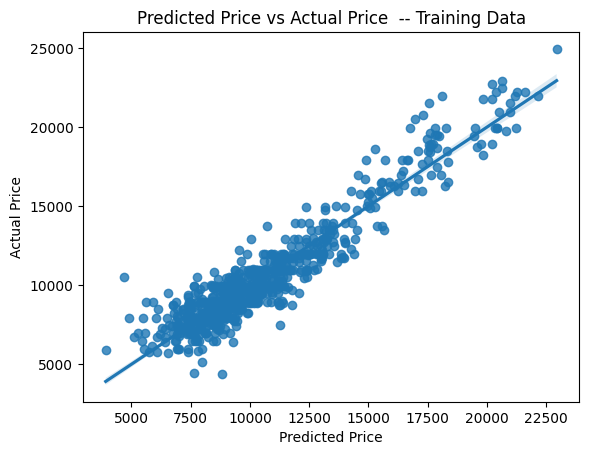

In [10]:
# first inspect visualization of model predicted price v actual for training data

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = lr_model.predict(X_train)
sns.regplot(x=y_pred, y=y_train)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Predicted Price vs Actual Price  -- Training Data")
plt.show()

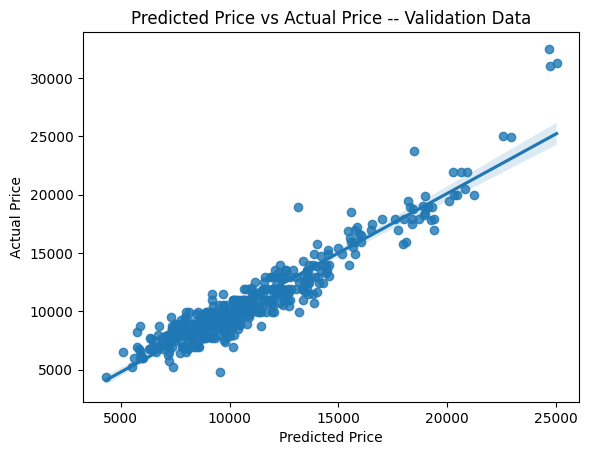

In [11]:
# Also inspect visualization of model predicted price v actual for test data

import seaborn as sns

y_pred = lr_model.predict(X_valid)
sns.regplot(x=y_pred, y=y_valid)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Predicted Price vs Actual Price -- Validation Data")
plt.show()

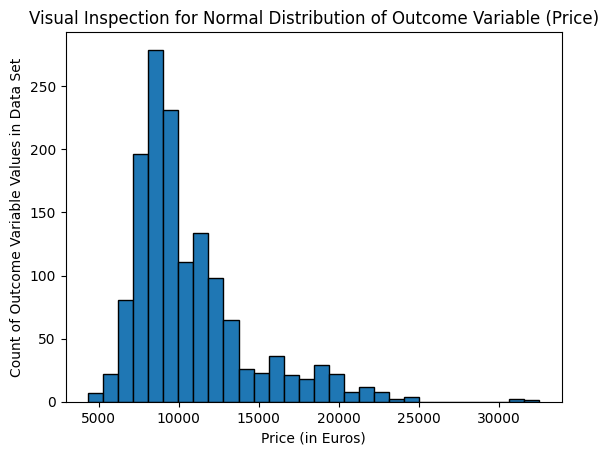

None


In [12]:
#see distribution of outcome varible to determine if Linear Regression assumtions of normality are reasonable

#create histogram to visualize values in dataset
plt.xlabel("Price (in Euros)")
plt.ylabel("Count of Outcome Variable Values in Data Set")
plt.title('Visual Inspection for Normal Distribution of Outcome Variable (Price)')
plt.hist(corrola_enc['Price'], edgecolor='black', bins=30)

#fig = sm.qqplot(corrola_enc['Price'], line='45')
print(plt.show())


In [13]:
# The only parameter based estimation of normaility from this list ( https://www.statology.org/normality-test-python/ ) that works as expected is Shapiro test.
# the very low pvalue of the test statistic does indicate that the assumption of normality may not be valid for our Linear Regression model
# This result would support a future recommendation of exploring other outcome variable transformations or training models that better match the price outcome distribution

from scipy.stats import shapiro

#print(shapiro(lognorm_dataset))
#shapiro(corrola_enc['Price'].values)
shapiro(corrola_enc['Price'])

#ShapiroResult(statistic=0.8573324680328369, pvalue=3.880663073872444e-29)

ShapiroResult(statistic=0.8522822856903076, pvalue=1.2140943021843038e-34)

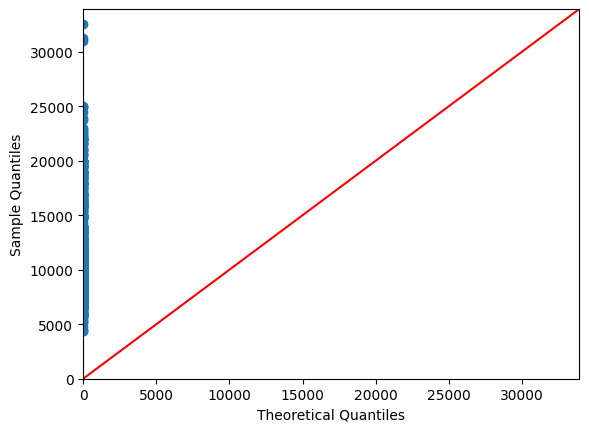

In [14]:
# We were unable to condition data to provide valid qq plot or Kolmogorov-Smirnov Test
# Future Recommendation: use invest time to generate valid tests, since shapiro test does support valid linear regression assumptions about outcome normal distribution
fig = sm.qqplot(corrola_enc['Price'].values, line='45')

plt.show()

In [15]:
import math
import numpy as np
from scipy.stats import kstest
from scipy.stats import lognorm

#make this example reproducible
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#perform Kolmogorov-Smirnov test for normality
print(kstest(lognorm_dataset, 'norm'))

print(kstest(corrola_enc['Price'].values, 'norm'))

#KstestResult(statistic=0.84125708308077, pvalue=0.0)

KstestResult(statistic=0.84125708308077, pvalue=0.0, statistic_location=1.2773298091955965, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=4350, statistic_sign=-1)


## Part II


### 1. Data Preprocessing. Split the data into training (60%), and validation (40%) datasets.

In [44]:
# Split data into training (60%) and validation (40%)
X_train_rt, X_valid_rt, y_train_rt, y_valid_rt = train_test_split(
    corrola_enc.drop('Price', axis=1), corrola_enc['Price'], test_size=0.6, random_state=1)

print(X_train_rt.shape)
print(y_train_rt.shape)
print(X_valid_rt.shape)
print(y_valid_rt.shape)

(574, 16)
(574,)
(862, 16)
(862,)


### 2. Run a full-grown regression tree (RT) with outcome variable Price and predictors Age_08_04, KM, Fuel_Type (first convert to dummies), HP, Automatic, Doors, Quarterly_Tax, Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player, Powered_Windows, Sport_Model, and Tow_Bar. Set random_state=1.

In [37]:
from sklearn.tree import DecisionTreeRegressor

# Create regressor object
reg_tree = DecisionTreeRegressor(random_state=1)

# Train the regressor
reg_tree.fit(X_train_rt, y_train_rt)

DecisionTreeRegressor(random_state=1)

### 3. Which appear to be the three or four most important car specifications for predicting the car’s price?

In [38]:
impSeries = pd.DataFrame(reg_tree.feature_importances_, index=X_train_rt.columns, columns=["Importance"])
impSeries.sort_values(by='Importance', ascending=False, inplace=True)
impSeries[0:4]

,Importance
Age_08_04,0.835041
KM,0.062228
HP,0.046551
Automatic_airco,0.015141


### 4. Compare the prediction errors of the training and validation sets by examining their RMS error and by plotting the two boxplots. How does the predictive performance of the validation set compare to the training set? Why does this occur?

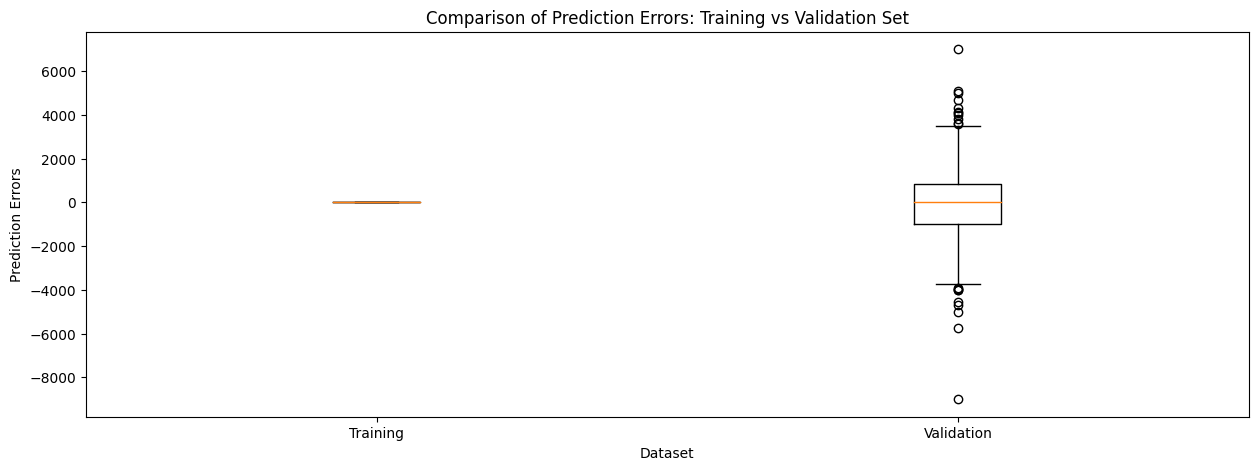

In [80]:
# Obtain prediction errors
X_val_rt = X_valid_rt
y_val_rt = y_valid_rt
y_pred_rt = reg_tree.predict(X_valid_rt)

errors_train = y_train_rt - reg_tree.predict(X_train_rt)
errors_val = y_val_rt - y_pred_rt

combined_Data = [errors_train, errors_val]

import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.boxplot(combined_Data, labels=['Training', 'Validation'])
plt.ylabel('Prediction Errors')
plt.xlabel('Dataset')
plt.title('Comparison of Prediction Errors: Training vs Validation Set')
plt.show()

### 5. Predict the price, using the smaller RT of a used Toyota Corolla with the specifications listed in Table 1, see below.

In [61]:
x_new = pd.DataFrame(columns=['Age_08_04', 'KM', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax', 'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows', 'Sport_Model', 'Tow_Bar',  'Fuel_Type_Diesel', 'Fuel_Type_Petrol'])

x_new.loc[0] = [77, 117000, 110, 0, 5, 100, 0, 3, 1, 0, 0, 0, 0, 1, 0, 1]
x_new

,Age_08_04,KM,HP,Automatic,Doors,Quarterly_Tax,Mfr_Guarantee,Guarantee_Period,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar,Fuel_Type_Diesel,Fuel_Type_Petrol
0,77,117000,110,0,5,100,0,3,1,0,0,0,0,1,0,1


In [56]:
corrola_enc.columns

Index(['Age_08_04', 'KM', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax',
       'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco',
       'CD_Player', 'Powered_Windows', 'Sport_Model', 'Tow_Bar', 'Price',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')

In [58]:
new_specs = [77, 117000, 110, 0, 5, 100, 0, 3, 1, 0, 0, 0, 0, 1, 0, 1]
X_new = pd.DataFrame(new_specs, columns=['Age_08_04', 'KM', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax', 'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows', 'Sport_Model', 'Tow_Bar',  'Fuel_Type_Diesel', 'Fuel_Type_Petrol'])
X_new

ValueError: Shape of passed values is (16, 1), indices imply (16, 16)

In [21]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor, filled=True)

NameError: name 'tree' is not defined

<Figure size 2500x2000 with 0 Axes>

In [ ]:
import graphviz as gv
import pylab

rPLot = gv.Graph(format='png')

#g1.node('A')
#g1.node('B')
#g1.edge('A', 'B')

#g1.view()
#print(g1.source)

#filename = g1.render(filename='img/g1')

#pylab.savefig('filename.png')

import graphviz
tree.export_graphviz(regressor, out_file=None,
                                filled=True)
#print(dot_data.source)
#graphviz.Source(dot_data, format="png")
#plt.savefig('tree5by1.png')

In [ ]:
from graphviz import Source
from sklearn import tree

plt.figure(figsize=(500, 200))

graph = Source( tree.export_graphviz(regressor, out_file=None, filled=True, rounded=True, proportion=True, feature_names=X_train.columns))
png_bytes = graph.pipe(format='png')
with open('corollaTreecolor_5x2.png','wb') as f:
    f.write(png_bytes)

#Source( tree.export_graphviz(regressor, out_file=None, feature_names=X_train.columns))

In [ ]:
from sklearn import tree

text_representation = tree.export_text(regressor)
print(text_representation)

In [ ]:
# Plot tree
from sklearn.tree import plot_tree

corolla_tree_plot = plot_tree(regressor, feature_names=X_train.columns, filled=True)

In [ ]:
plt.figure(figsize=(500, 100))
plot_tree(regressor, feature_names=X_train.columns, filled=True)
plt.savefig('tree5by1.png')

$\hat{y}= \beta_0 + \beta_1 + \beta_2...\beta_P$